In [173]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
df = pd.read_csv('Datasets/prc_Food_Germany_sorted.csv', sep=",", header=0)
df

,Datetime,FoodPriceIndex
0,1996-01,74.9
1,1996-02,75.5
2,1996-03,76.1
3,1996-04,76.4
4,1996-05,76.2
...,...,...
325,2023-02,145.6
326,2023-03,147.6
327,2023-04,146.5
328,2023-05,146.2


Preprocessing Pipeline:

* Drop data before 1996
* Create a new column consisting of the year and month (format: YYYY-MM)
* Rename the Column "Deutschland" to "Temperature (°C)"
* Delete unnecassary columns
* Change the order

In [178]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.drop(X[X["Jahr"]<1996].index)
        X.reset_index(drop=True)
        return X
    
    
class ColumnCreater(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["Date"] = X["Jahr"].astype(str) + "-" + "0" + df["Monat"].astype(str)
        return X
    
    
class NameChanger(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        print('hello')
        X.rename(columns = {"Time":"Year"}, inplace=True)
        return X
    

class ColumnDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        columns_to_delete = list(range(0,18))
        return X.drop(X.columns[columns_to_delete], axis=1)
    

class OrderChanger(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        new_columns_order = ["Date", "Temperature (°C)"]
        return X[new_columns_order]
    

class ShowOutliers(BaseEstimator, TransformerMixin):

    def __init__(self,min,max):
        self.min = min
        self.max = max

    def fit(self, X, y= None):
        return self
    
    def transform(self, X):
        print(self.min)
        print(self.max)
        X['FoodPriceIndex'].plot(kind='hist',bins=500)
        print(X.query(f'FoodPriceIndex < {self.min}'))
        print(X.query(f'FoodPriceIndex > {self.max}'))
        return X

class RemoveOutliers(BaseEstimator, TransformerMixin):

    def __init__(self,min,max):
        self.min = min
        self.max = max

    def fit(self, X, y= None):
        return self
    
    def transform(self, X):
        X = X.query((f'FoodPriceIndex > {self.min}'))
        X = X.query((f'FoodPriceIndex < {self.max}'))
        return X 


class ConvertDateTime(BaseEstimator, TransformerMixin):

    def fit(self, X, y= None):
        return self
    
    def transform(self, X):
        print(type(X))
        X = X.set_index('Datetime')
        X.index = pd.to_datetime(X.index)
        return X



class DropPost21(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.loc[X.index < '2021-11']
        return X
    
class PlotPreData(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Foodprice index')
        plt.show
        return X
    

class AbsDiffData(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.diff()
        X = X.dropna()
        fig, ax = plt.subplots(figsize=(15,5))
        X.plot(ax=ax, label='Training Set', title='Difference between Data Points')
        ax.axvline('2015-01',color='black', ls='--')
        ax.legend(['Training Set', 'Test Set'])
        plt.show()
        return X

   

### For debugging:

<class 'pandas.core.frame.DataFrame'>


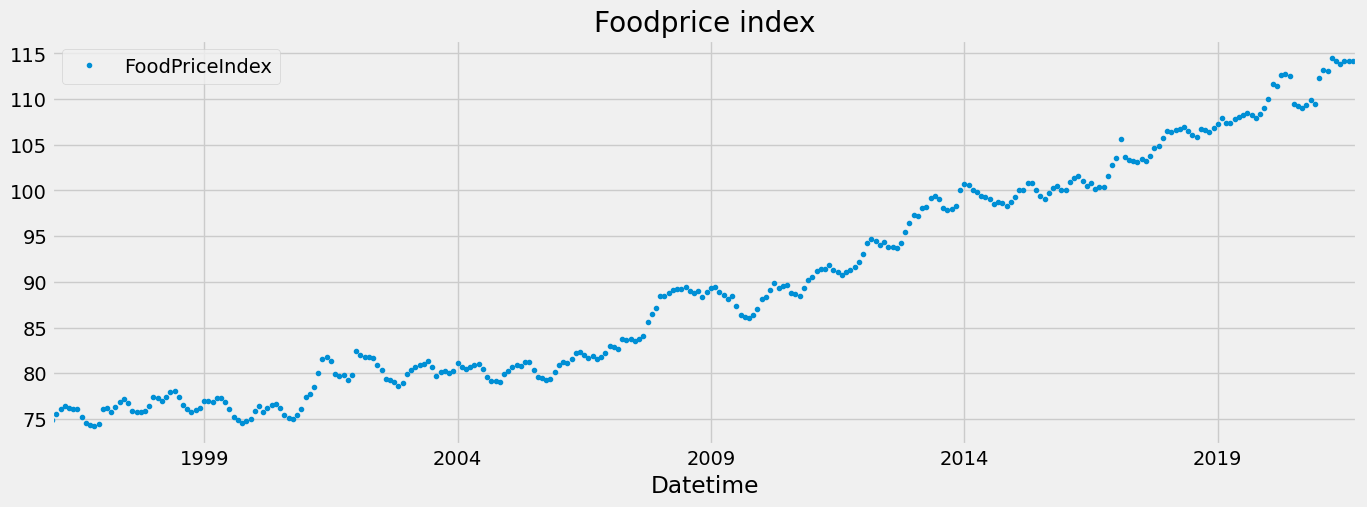

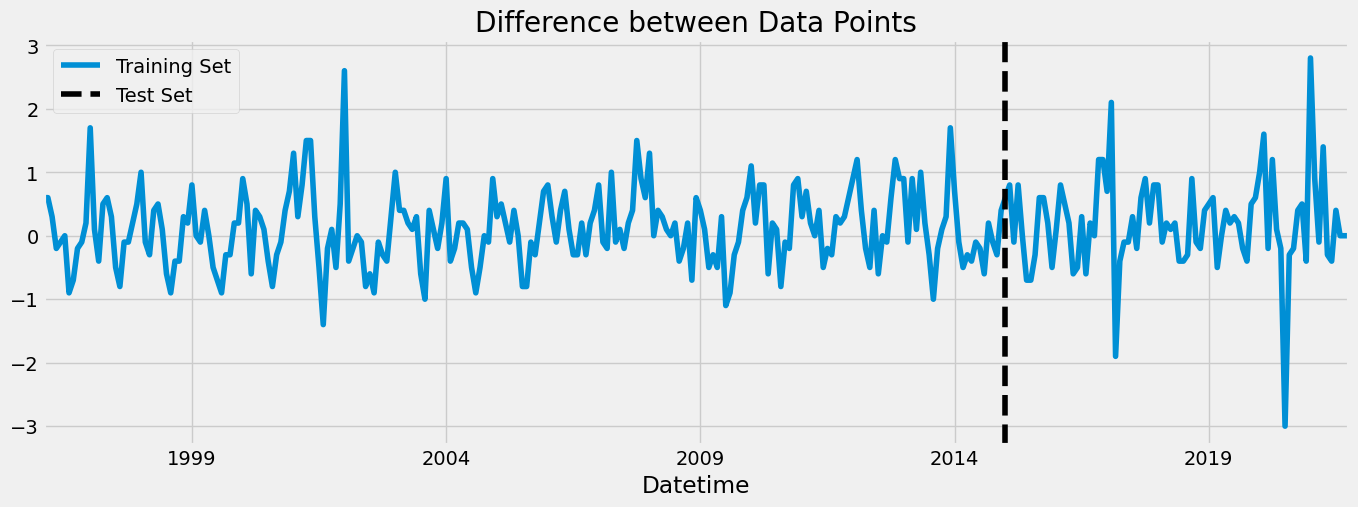

-1
2.5
            FoodPriceIndex
Datetime                  
2001-08-01            -1.4
2009-07-01            -1.1
2017-03-01            -1.9
2020-07-01            -3.0
            FoodPriceIndex
Datetime                  
2002-01-01             2.6
2021-01-01             2.8


,FoodPriceIndex
Datetime,
1996-02-01,0.6
1996-03-01,0.6
1996-04-01,0.3
1996-05-01,-0.2
1996-06-01,-0.1
...,...
2021-06-01,-0.4
2021-07-01,0.4
2021-08-01,0.0


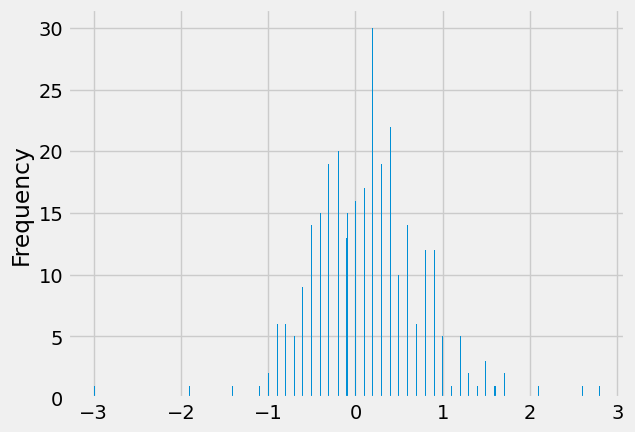

In [174]:
from sklearn.pipeline import Pipeline



pipe = Pipeline([
    ("1", ConvertDateTime()),
    ("2", DropPost21()),
    ("3", PlotPreData()),
    ("4", AbsDiffData()),
    ("5", ShowOutliers(-1,2.5))     #print values lower than (...,) and higher than (,...)
])

df = pipe.fit_transform(df)


df

In [179]:
pipe2 =  Pipeline([
    ("5", RemoveOutliers(-1,2.5))
])

df = pipe2.fit_transform(df)


In [186]:
df['FoodPriceIndex'].max()

2.0999999999999943